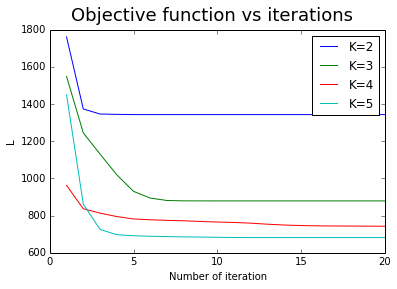

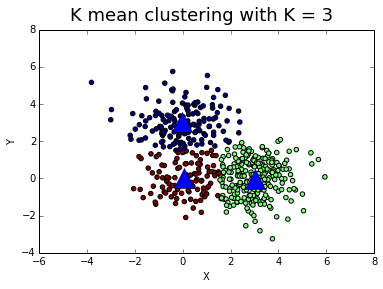

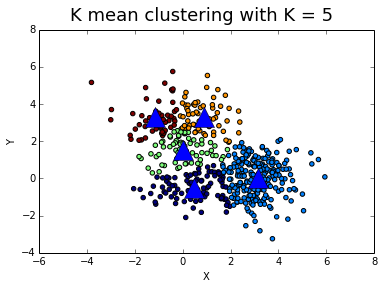

0% done.
10% done.
20% done.
30% done.
40% done.
50% done.
60% done.
70% done.
80% done.
90% done.


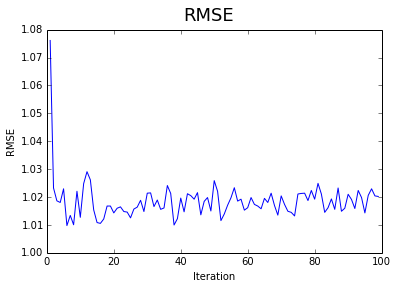

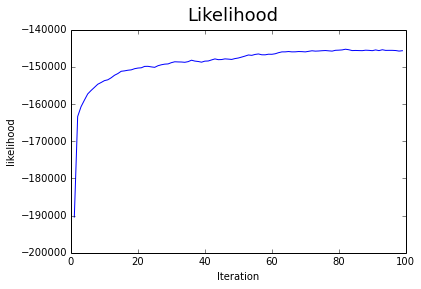

Selected movie: Shawshank Redemption, The (1994)
1. closest movie: Grand Day Out, A (1992), distance: 0.573527166136
2. closest movie: Dead Poets Society (1989), distance: 0.613681609416
3. closest movie: Phenomenon (1996), distance: 0.626543044145
4. closest movie: Willy Wonka and the Chocolate Factory (1971), distance: 0.683998888586
5. closest movie: Smoke (1995), distance: 0.702115093614


Selected movie: Alien (1979)
1. closest movie: Terminator, The (1984), distance: 0.385454315245
2. closest movie: Perfect Candidate, A (1996), distance: 0.392073916549
3. closest movie: One Flew Over the Cuckoo's Nest (1975), distance: 0.509082315166
4. closest movie: Man of No Importance, A (1994), distance: 0.511311160591
5. closest movie: Raiders of the Lost Ark (1981), distance: 0.512922173809


Selected movie: Mission: Impossible (1996)
1. closest movie: True Crime (1995), distance: 0.29975214404
2. closest movie: Lady of Burlesque (1943), distance: 0.372663706325
3. closest movie: Damsel in

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def sampler(n, weight):
    results = []
    # Create CDF from input distribution
    cdf = np.zeros((len(weight),1))
    cdf[0] = weight[0]
    for i in range(1,len(weight)):
        cdf[i] = cdf[i-1]+weight[i]
    # Get a random number and find, which inex of CDF it corresponds to
    for i in range(0, n):
        roll = np.random.random()
        idx = np.argmin(abs(cdf-roll))
        if cdf[idx]<roll:
            idx = idx + 1
        results.append(idx)
    return results
    
 
np.random.seed(199009191) #199009191

# Problem I
# Draw samples with distribution pi
pi = np.asarray([[0.2, 0.5, 0.3]]).T
n = 500
sample = sampler(n,pi)

# Gaussians of data generation
mu_1 = np.asarray([0,0])
mu_2 = np.asarray([3,0])
mu_3 = np.asarray([0,3])
mu = [mu_1, mu_2, mu_3]
sigma_1 = np.identity(2)
sigma_2 = np.identity(2)
sigma_3 = np.identity(2)
sigma = [sigma_1, sigma_2, sigma_3]

# Generate data
data = np.zeros((n,2))
for i in range(0,n):
    data[i,:] = np.random.multivariate_normal(mu[sample[i]], sigma[sample[i]])
    
K = [2, 3, 4, 5]  # Number of clusters
T = 20  # Iterations

# Initialize means and labels
means = np.random.random_sample((max(K),len(mu_1),len(K)))*6-3 # max(K) x len(mu) x len(K)
c = np.zeros((n,len(K)))  # Label
L = np.zeros((T,len(K))) # Objective function

for t in range(0,T):
    for k in range(0,len(K)):        
        # Calculate distances from centroids
        distance = []
        for i in range(0,K[k]):
            distance = np.append(distance,np.sqrt(np.sum(np.power(data-means[i,:,k],2), axis=1)))
        distance = distance.reshape((n,K[k]), order = 'F')
        
        # Finding closest centroid
        c[:,k] = np.argmin(distance, axis=1)
        
        # Updating means
        for i in range(0,K[k]):
            means[i,:,k] = np.mean(data[(c[:,k]==i),:], axis=0)
            
        # Objective function    
        #L[t,k] = np.sum(np.sqrt(np.sum(np.power(data-means[(c[:,k]).astype(int),:,k],2), axis=1)))
        L[t,k] = np.sum(np.sum(np.power(data-means[(c[:,k]).astype(int),:,k],2), axis=1))
 
# Plot for objective functions       
fig = plt.figure()
[k1,k2,k3,k4] = plt.plot(np.arange(1,T+1),L)
plt.ylabel('L')
plt.xlabel('Number of iteration')
plt.legend([k1,k2,k3,k4], ['K=2', 'K=3', 'K=4', 'K=5'], loc=1)
fig.suptitle('Objective function vs iterations', fontsize=18)
plt.show()

# Plot for clusters
for idx in [1,3]:
    fig = plt.figure()
    plt.scatter(data[:,0], data[:,1], c=c[:,idx])
    plt.plot(means[0:K[idx],0,idx], means[0:K[idx],1,idx],'b^', markersize=20) # centers of clusters
    plt.ylabel('Y')
    plt.xlabel('X')
    fig.suptitle('K mean clustering with K = %s'%(K[idx]), fontsize=18)
    plt.show()





    
# Problem II    
np.random.seed(19901)    #1990
# Load data
X_Train = np.genfromtxt("./movies_csv/ratings.txt", delimiter=',', dtype='int32')
X_Test = np.genfromtxt("./movies_csv/ratings_test.txt", delimiter=',', dtype='int32')
label = np.genfromtxt("./movies_csv/movies.txt", dtype='string', delimiter='\n')    

# Set indexing to start with 0, instead 1 (for python)
X_Train[:,0:2] = X_Train[:,0:2]-1
X_Test[:,0:2] = X_Test[:,0:2]-1 

# Initializing variables
sigma = 0.25
d = 10
lamb = 10 # lambda
Sig = np.identity(d)/lamb # Covariance of V and U
T = 100
N1 = max(X_Train[:,0])+1
N2 = len(label)

 
# Register users who rated each movie
vj = [] # indicies of users who rated film j    
film_score = [] # scores of film j
missing = [] # movies without rating
for j in range(0,N2):   # iterate through each movie
    vj.append(X_Train[np.argwhere(X_Train[:,1]== j),0])
    film_score.append(X_Train[np.argwhere(X_Train[:,1]== j),2])
    if (np.argwhere(X_Train[:,1]== j).shape == (0,1)):
        missing.append(j)
    
# Option to clean data from movies without rating
clean = 0
if clean == 1:
    label = np.delete(label, missing)
    for i in range(0,len(missing)):
        idx = np.argwhere(X_Train[:,1]>(missing[i]-i))
        X_Train[idx,1] = X_Train[idx,1]-1
        idx2 = np.argwhere(X_Test[:,1]>(missing[i]-i))
        X_Test[idx2,1] = X_Test[idx2,1]-1
    N2 = len(label)
    for j in range(0,N2):   # iterate through each movie
        vj.append(X_Train[np.argwhere(X_Train[:,1]== j),0])
        film_score.append(X_Train[np.argwhere(X_Train[:,1]== j),2])


# Register films watched by each user and their rating on the films 1:N1
ui = [] # indicies of filmes rated by users
user_score = [] # scores for rated movies by users
for i in range(0,N1):   # iterate through each user
    ui.append(X_Train[np.argwhere(X_Train[:,0]== i),1])
    user_score.append(X_Train[np.argwhere(X_Train[:,0]== i),2])
   
# Initialize V an U
V = np.random.multivariate_normal(np.zeros((N2,)), np.identity(N2)/lamb, d)
U = np.zeros((N1,d))
#U = np.random.multivariate_normal(np.zeros((N1,)), np.identity(N1)/lamb, d).T

var = np.identity(d)*lamb*sigma  # Constant variance
rmse = []
L = []  # Objective function
for t in range(0,T):
    
    # Update each u vector
    for i in range(0,N1):
        U[i,:] = np.dot(np.linalg.inv(var+np.dot(V[:,ui[i]].reshape(d,len(ui[i])),V[:,ui[i]].reshape(d,len(ui[i])).T)),np.dot(V[:,ui[i]].reshape(d,len(ui[i])),user_score[i])).reshape(1,d)        
    
    # Update each v vector
    for j in range(0,N2):
        V[:,j] = np.dot(np.linalg.inv(var+np.dot(U[vj[j],:].reshape(d,len(vj[j])),U[vj[j],:].reshape(d,len(vj[j])).T)),np.dot(U[vj[j],:].reshape(d,len(vj[j])),film_score[j])).reshape(d,)

    if t%10 ==0:
        print str(t) + '% done.'

    # Predictade rating
    u_v = np.dot(U,V)    
    # Test data prediction
    y_pred = np.rint(u_v[X_Test[:,0], X_Test[:,1]])
    # RMSE
    rmse.append(np.sqrt(np.sum(np.power((y_pred-X_Test[:,2]),2))/len(y_pred)))
    
    # Loglike consists of the likelihood of three gaussians for M_ij, U, and V
    gaus1 = -len(X_Train)/2*np.log(2*np.pi)-len(X_Train)/2*np.log(sigma)-np.sum(np.power((X_Train[:,2]-u_v[X_Train[:,0],X_Train[:,1]]),2))/2/sigma
    gaus2 = -N1/2.0*np.log(np.linalg.det(Sig))-np.trace(np.dot(np.dot(U,Sig),U.T))-N1/2.0*np.log(2*np.pi)
    gaus3 = -N2/2.0*np.log(np.linalg.det(Sig))-np.trace(np.dot(np.dot(V.T,Sig),V))-N2/2.0*np.log(2*np.pi)
    L.append((gaus1+gaus2+gaus3))

# Plot for RMSE
fig = plt.figure()
plt.plot(np.arange(1,len(rmse)), rmse[1:])
plt.ylabel('RMSE')
plt.xlabel('Iteration')
fig.suptitle('RMSE', fontsize=18)
plt.show()

# Plot for likelihood
fig = plt.figure()
plt.plot(np.arange(1,len(L)), L[1:])
plt.ylabel('likelihood')
plt.xlabel('Iteration')
fig.suptitle('Likelihood', fontsize=18)
plt.show()

# Selecting three arbitrary films
films = np.asarray([63, 182, 404]) #55

for f in films:
    # Calculate distances
    distance = np.sqrt(np.sum(np.power(V-V[:,f].reshape(d,1),2), axis=0)).reshape(N2,1)
    # Assigning indices and sorting  
    labeledDist = np.concatenate((distance, np.arange(0,N2).reshape(N2,1)), axis=1)
    sortedDist = np.sort(labeledDist.view('float64,float64'), order=['f0'], axis=0).view(np.float)
    print 'Selected movie: ' + str(label[f])
    for k in range(1,6):
        print str(k) + '. closest movie: ' + label[sortedDist[k,1].astype(int)] + ', distance: ' + str(sortedDist[k,0])
    print '\n'
 






# k-means on U and V    
np.random.seed(19900919)#1990 
T = 20 # Iterations
k = 20 # Number of clusters

# Initialize means and labels
start_u = np.random.randint(0,N1,(k,1)) # Select starting points as u vectors in order to insure convergence
means_u = U[start_u,:].reshape(k,d)
start_v = np.random.randint(0,N2,(k,1))  # Select starting points as v vectors in order to insure convergence
means_v = V[:,start_v].reshape(d,k)
# Initialize labels
c_u = np.zeros((N1,1))
c_v = np.zeros((N2,1))

# Option to clean data of movies without rating
clean = 1
if clean == 1:
    label = np.delete(label, missing)
    V = np.delete(V, missing, axis = 1)
    N2 = int(V.shape[1])

for t in range(0,T):   
    # Calculate distances from centroids
    distance_u = []
    distance_v = []
    for i in range(0,k):
        distance_u = np.append(distance_u,np.sqrt(np.sum(np.power(U-means_u[i,:],2), axis=1)))
        distance_v = np.append(distance_v,np.sqrt(np.sum(np.power(V-means_v[:,i].reshape(d,1),2), axis=0)))
    distance_u = distance_u.reshape((N1,k), order = 'F')
    distance_v = distance_v.reshape((N2,k), order = 'F')
   
    # Finding closest centroid
    c_u = np.argmin(distance_u, axis=1)
    c_v = np.argmin(distance_v, axis=1)    
    
    # Updating means
    for i in range(0,k):
        means_u[i,:] = np.mean(U[np.argwhere(c_u==i),:].reshape(len(np.argwhere(c_u==i)),d), axis=0)
        means_v[:,i] = np.mean(V[:,np.argwhere(c_v==i)].reshape(d,len(np.argwhere(c_v ==i))),axis=1)

# Count number of users and films in each cluster
counter_cu=np.zeros((k,1))
counter_cv=np.zeros((k,1))
for t in range(0,max(N1,N2)):
    if t<N1:
        counter_cu[c_u[t],0] +=1
    if t<N2:
        counter_cv[c_v[t],0] +=1

# Finding top 10 films for clusters
labeledCounter_u = np.concatenate((counter_cu, np.arange(0,k).reshape(k,1)), axis=1)
labeledCounter_v = np.concatenate((counter_cv, np.arange(0,k).reshape(k,1)), axis=1)
sortedCounter_u = np.sort(labeledCounter_u.view('float64,float64'), order=['f0'], axis=0).view(np.float)
sortedCounter_v = np.sort(labeledCounter_v.view('float64,float64'), order=['f0'], axis=0).view(np.float)

print 'Top five user clusters:\n'
for t in range(1,6):
    print '\nCentroid of ' + str(int(sortedCounter_u[-t,1])) + '.th user cluster: ' + str(means_u[int(sortedCounter_u[-t,1]),:]) 
    print '\nNumber of users allocated to ' + str(int(sortedCounter_u[-t,1])) + '.th user cluster: ' + str(int(sortedCounter_u[-t,0])) + '\n'
    prod_u = np.dot(means_u[int(sortedCounter_u[-t,1]),:],V)
    labeledprod_u = np.concatenate((prod_u.reshape(N2,1), np.arange(0,N2).reshape(N2,1)), axis=1)
    sortedProd_u = np.sort(labeledprod_u.view('float64,float64'), order=['f0'], axis=0).view(np.float)
    print 'Top 10 movies for ' + str(int(sortedCounter_u[-t,1])) +'.th user centroid:'
    for i in range(1,11):
        print label[int(sortedProd_u[-i,1])] +', dot product: ' + str(sortedProd_u[-i,0])

print '\nTop five film clusters:'
for t in range(1,6):
    print '\nCentroid of ' + str(int(sortedCounter_v[-t,1])) + '.th movie cluster: ' + str(means_u[int(sortedCounter_v[-t,1]),:]) 
    print '\nNumber of movies allocated to ' + str(int(sortedCounter_v[-t,1])) + '.th movie cluster: ' + str(int(sortedCounter_v[-t,0])) + '\n'
    dist_v = np.sqrt(np.sum(np.power(V-means_v[:,int(sortedCounter_v[-t,1])].reshape(d,1),2), axis=0)).reshape(N2,1)
    labeledDist_v = np.concatenate((dist_v.reshape(N2,1), np.arange(0,N2).reshape(N2,1)), axis=1)
    sortedDist_v = np.sort(labeledDist_v.view('float64,float64'), order=['f0'], axis=0).view(np.float)
    print 'Closest 10 movies for ' + str(int(sortedCounter_v[-t,1])) +'.th movie centroid:'
    for i in range(0,10):
        print label[int(sortedDist_v[i,1])] +', distance: ' + str(sortedDist_v[i,0])
    
    
    
    